## Analyse Nutzung
Überblick über die Nutzungsart der Gebäude

In [1]:
import pandas as pd
import package.charts as charts
import package.importer as im
import seaborn as sns
import matplotlib.pyplot as plt

# set size of seaborn plots
charts.set_plot_size(sns)

df = im.get_dataset('package/dataset.csv')
pd.set_option('display.max_rows', 500)  # to show all value_counts


#### Verteilung im Datenset


In [2]:
df[im.FIELD_USAGE_CLUSTER].value_counts()

WOHNEN           244
SCHULEN          163
HALLEN            88
BUERO             86
BETRIEB           61
BEHERBERGUNG      56
KULTUS_KULTUR     26
GESUNDHEIT        24
ANDERES           14
OFFENE_BAUTEN      8
TECHNIK            8
IRRELEVANT         7
AUSSENANLAGEN      1
Name: usage_cluster, dtype: int64

In [3]:
df[im.FIELD_NOM_USAGE_MAIN].value_counts()


WOHNBAUTEN__MFH_MEDIUM                                                                108
SCHULBAUTEN__VOLKSSCHULEN                                                              87
FREIZEITBAUTEN_SPORTBAUTEN_ERHOLUNGSBAUTEN__TURNHALLEN_SPORTHALLEN_MEHRZWECKHALLEN     43
WOHNBAUTEN__MFH_LOW                                                                    31
WOHNBAUTEN__EFH_REIHEN_MEDIUM                                                          28
VERKEHRSBAUTEN__WERKHOEFE                                                              28
SCHULBAUTEN__KINDERGAERTEN_HORTE                                                       28
BUEROBAUTEN__VOLLAUSBAU                                                                27
WOHNBAUTEN__MFH_HIGH                                                                   25
VERWALTUNGSBAUTEN                                                                      23
WOHNBAUTEN__EFH_REIHEN_HIGH                                                            19
WOHNBAUTEN

## Nutzungen kombinieren
Der Datensatz enthält sehr unterschiedliche Datenmengen pro Nutzungstyp. Wenn zu wenig Daten vorhanden sind, macht das Verwenden des Felds 'usage_cluster' oder weiteres Zusammenfassen Sinn. Für Nutzungstypen mit vielen Daten (Wohnen, Schulen etc.) macht es Sinn, ein spezifischeren Typ zu verwenden.

**Mehrfamilienhäuser**<br>
WOHNBAUTEN__MFH_MEDIUM<br>
WOHNBAUTEN__MFH_LOW<br>
WOHNBAUTEN__MFH_HIGH<br>

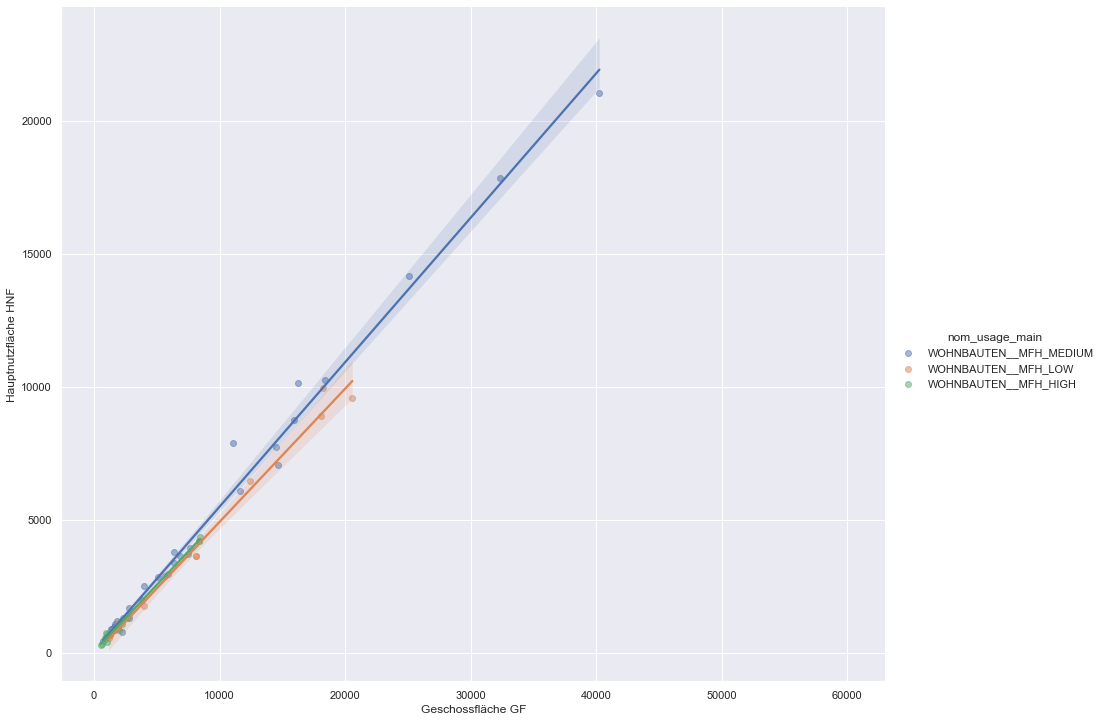

In [4]:
types_wohnen_mfh = ['WOHNBAUTEN__MFH_HIGH', 'WOHNBAUTEN__MFH_MEDIUM', 'WOHNBAUTEN__MFH_LOW']
mfh_df = df[df[im.FIELD_NOM_USAGE_MAIN].isin(types_wohnen_mfh)]

charts.lmplot_gf_hnf(mfh_df, hue=im.FIELD_NOM_USAGE_MAIN)

**Einfamilienhäuser**<br>
WOHNBAUTEN__EFH_REIHEN_LOW<br>
WOHNBAUTEN__EFH_REIHEN_MEDIUM<br>
WOHNBAUTEN__EFH_REIHEN_HIGH

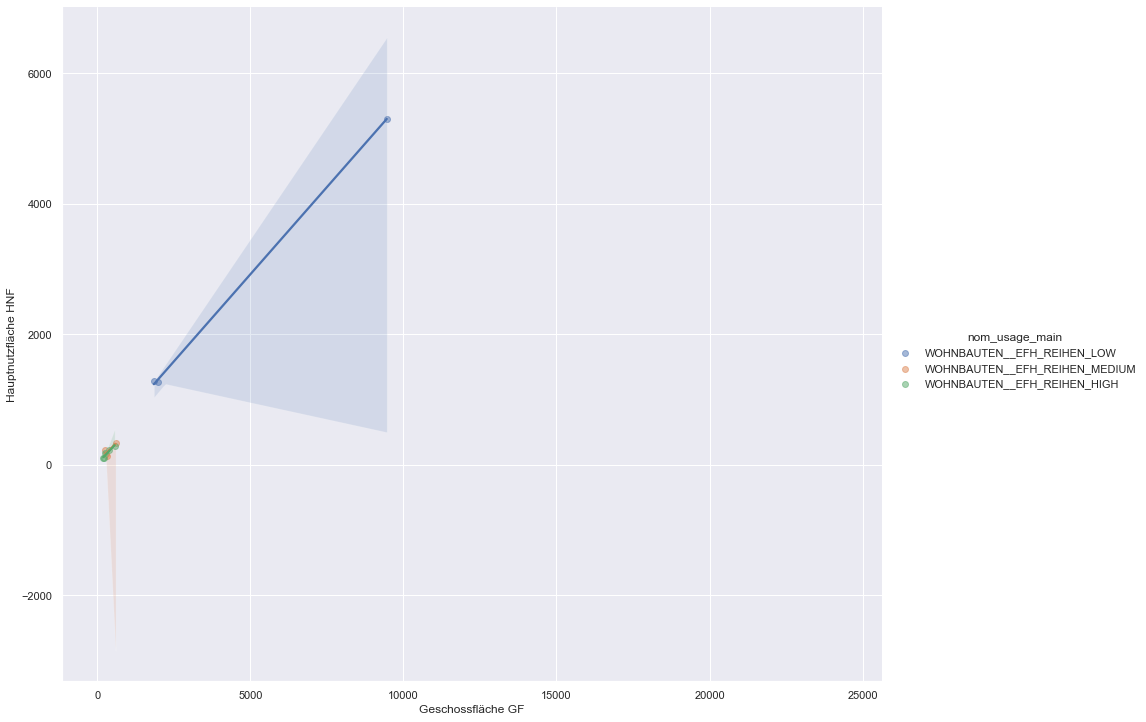

In [5]:
types_wohnen_efh = ['WOHNBAUTEN__EFH_REIHEN_LOW', 'WOHNBAUTEN__EFH_REIHEN_MEDIUM', 'WOHNBAUTEN__EFH_REIHEN_HIGH']
efh_df = df[df[im.FIELD_NOM_USAGE_MAIN].isin(types_wohnen_efh)]

charts.lmplot_gf_hnf(efh_df, hue=im.FIELD_NOM_USAGE_MAIN)

**Schulen sinnvoll aufteilen?**<br>
SCHULBAUTEN__VOLKSSCHULEN<br>
SCHULBAUTEN__KINDERGAERTEN_HORTE<br>
SCHULBAUTEN__BERUFSSCHULEN<br>
SCHULBAUTEN__HOCHSCHULEN_UNIVERSITAETEN<br>
SCHULBAUTEN__FORSCHUNGSBAUTEN_MIT_LABOR<br>
SCHULBAUTEN__BIBLIOTHEKEN<br>
SCHULBAUTEN__FORSCHUNGSBAUTEN_OHNE_LABOR<br>
SCHULBAUTEN__HEILPAEDAGOGISCHE_SONDERSCHULEN<br>

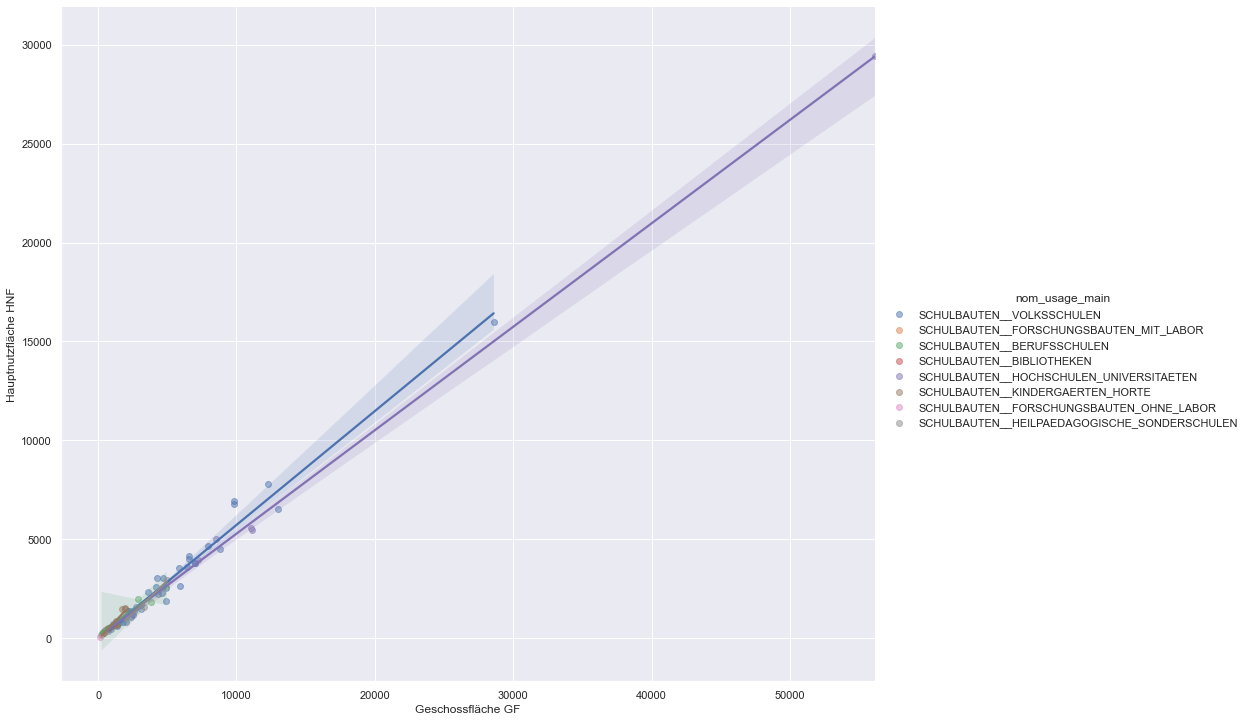

In [6]:
types_schulen = ['SCHULBAUTEN__VOLKSSCHULEN',
                 'SCHULBAUTEN__KINDERGAERTEN_HORTE',
                 'SCHULBAUTEN__BERUFSSCHULEN',
                 'SCHULBAUTEN__HOCHSCHULEN_UNIVERSITAETEN',
                 'SCHULBAUTEN__FORSCHUNGSBAUTEN_MIT_LABOR',
                 'SCHULBAUTEN__BIBLIOTHEKEN',
                 'SCHULBAUTEN__FORSCHUNGSBAUTEN_OHNE_LABOR',
                 'SCHULBAUTEN__HEILPAEDAGOGISCHE_SONDERSCHULEN'
                 ]
schulen_df = df[df[im.FIELD_NOM_USAGE_MAIN].isin(types_schulen)]

charts.lmplot_gf_hnf(schulen_df, hue=im.FIELD_NOM_USAGE_MAIN)

**Rest**<br>
Vermutlich vorerst auf Usage Cluster zurückgreifen.


## Ausreisser
Ausreisser bei den Usage Clustern.

1) Description der verschiedenen Cluster. <br>
2) Ratio-Verteilung mit Ausreissern der verschiedenen Clustern – (Aussenanlagen, Betrieb, Offene Bauten und Irrelevant ausgeschlossen)<br>

,count,mean,std,min,25%,50%,75%,max
usage_cluster,,,,,,,,
ANDERES,9.0,0.480795,0.134964,0.319575,0.363032,0.479798,0.620709,0.637772
AUSSENANLAGEN,1.0,0.602857,NaN,0.602857,0.602857,0.602857,0.602857,0.602857
BEHERBERGUNG,26.0,0.540306,0.100328,0.344300,0.488199,0.539603,0.584460,0.806061
BETRIEB,28.0,0.602235,0.201738,0.150253,0.508939,0.625981,0.737263,0.914773
BUERO,32.0,0.508033,0.115193,0.311340,0.434037,0.491694,0.554794,0.765244
GESUNDHEIT,6.0,0.425572,0.118838,0.284932,0.330770,0.433824,0.490129,0.595535
HALLEN,34.0,0.666180,0.147761,0.353293,0.564938,0.650840,0.738001,0.953629
IRRELEVANT,2.0,0.679538,0.222032,0.522538,0.601038,0.679538,0.758038,0.836538
KULTUS_KULTUR,10.0,0.625161,0.115306,0.461196,0.552138,0.602324,0.720067,0.793243


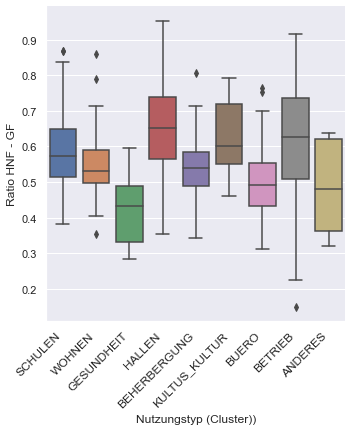

In [7]:
# TODO: Uses SIA 416 only
mask = df[im.FIELD_USAGE_CLUSTER].isin(['TECHNIK', 'AUSSENANLAGEN', 'IRRELEVANT', 'OFFENE_BAUTEN'])
plotData = df[~mask]
gf = sns.catplot(x=im.FIELD_USAGE_CLUSTER, y="ratio_hnf_gf", kind="box", data=plotData)

gf.set(xlabel='Nutzungstyp (Cluster))', ylabel='Ratio HNF - GF')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'
)

# Check different cluster sizes
df[im.FIELD_USAGE_CLUSTER] = df[im.FIELD_USAGE_CLUSTER].astype('category')
# data = data[data[im.FIELD_USAGE_CLUSTER] == "BETRIEB"]
data = df[im.FIELD_HNF_GF_RATIO]
data.groupby(df[im.FIELD_USAGE_CLUSTER]).describe()